In [19]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn

# from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\ProgramData\

In [26]:
data_set = pd.read_csv("data/trn.csv", sep=',', header=0, low_memory=False)

In [27]:
# encontra as variavies categoricas
for col in data_set.columns:
    if ((data_set[col].quantile() == 1.0) | (data_set[col].quantile() == 0.0)):
        data_set[col] = data_set[col].astype('category')

In [28]:
from sklearn.model_selection import train_test_split

In [39]:
X = data_set.loc[:, data_set.columns !='y']
y = data_set.iloc[:, data_set.columns == 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, random_state=42, stratify=y_train)

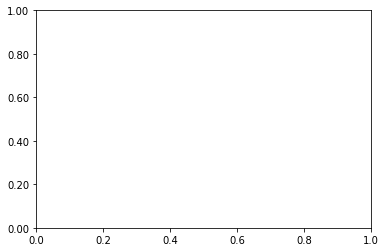

In [45]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

In [46]:
from sklearn import svm

Primeiro usando Kernel SVM com kernel do tipo rbf

In [ ]:
#testando svm kernel rbf
#treino
clf = svm.SVC(gamma=0.1000000000000001, C=100.0, probability = True, random_state=201)
clf.fit(X_train.values, y_train.values.ravel())

In [14]:
predited = clf.predict(X_test.values)
accuracy = accuracy_score(y_test.values, predited)
print("Mean accuracy score: {:.3}".format(accuracy))

Mean accuracy score: 0.658


,0,1
0,0,3332
1,0,6397


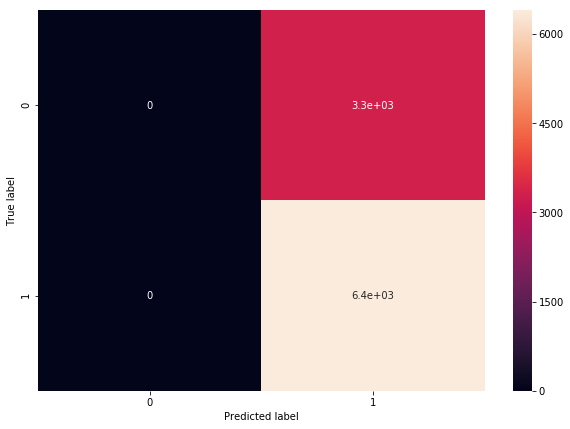

In [15]:
%matplotlib inline
cm = pd.DataFrame(confusion_matrix(y_test, predited))
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
cm

In [20]:
y_pred_clf = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_clf, pos_label=1)

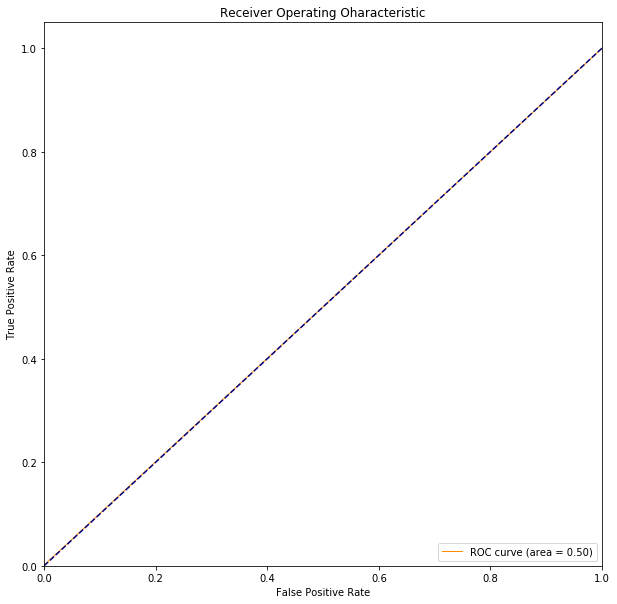

In [21]:
%matplotlib inline
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot(tpr, fpr, color='darkblue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Oharacteristic')
plt.legend(loc="lower right")
plt.show()

Kernel do tipo linear e do tipo polinomial demoram mais de 12 horas para terminarem a execução. Códigos a seguir

In [ ]:
#kernel linear
linear_clf = svm.SVC(gamma=0.001, C=100., kernel='linear')
linear_clf.fit(X_train.values, y_train.values.ravel())

In [ ]:
linear_predited = linear_clf.predict(X_test.values)
linear_accuracy = accuracy_score(y_test.values, linear_predited)
print("Mean accuracy score: {:.3}".format(linear_accuracy))

In [ ]:
linear_cm = pd.DataFrame( confusion_matrix(y_test, linear_predited))
linear_fig = plt.figure(figsize=(10,7))
linear_heatmap = sns.heatmap(linear_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
linear_cm

In [ ]:
#kernel polinomial
poly_clf = svm.SVC(gamma=0.001, C=100., kernel='poly')
poly_clf.fit(X_train.values, y_train.values.ravel())

In [ ]:
poly_predited = poly_clf.predict(X_test.values)
poly_accuracy = accuracy_score(y_test.values, poly_predited)
print("Mean accuracy score: {:.3}".format(poly_accuracy))

In [ ]:
poly_cm = pd.DataFrame( confusion_matrix(y_test, poly_predited))
poly_fig = plt.figure(figsize=(10,7))
poly_heatmap = sns.heatmap(poly_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
poly_cm